In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F

import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt

from PIL import Image
from IPython import display
import numpy as np
%matplotlib inline


In [3]:
model = models.densenet121(pretrained=True)

In [4]:
model.classifier = nn.Sequential(nn.Linear(1024, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

In [5]:
checkpoint = torch.load('catvdog.pth')
print(checkpoint.keys())

dict_keys(['parameters', 'state_dict'])


In [6]:
model.parameters = checkpoint['parameters']

In [7]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [8]:
def image_transform(imagepath):
    test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
    image = Image.open(imagepath)
    imagetensor = test_transforms(image)
    return imagetensor

In [15]:
imagepath = "dog.jpg"

model.eval()
image = image_transform(imagepath)
image1 = image[None,:, :, :]
ps = torch.exp(model(image1))
topconf, topclass = ps.topk(1, dim=1)
if topclass.item() == 1:
    prediction = {'class':'dog','confidence':str(topconf.item())}
else:
    prediction = {'class':'cat','confidence':str(topconf.item())}

In [16]:
prediction

{'class': 'dog', 'confidence': '0.9998372793197632'}

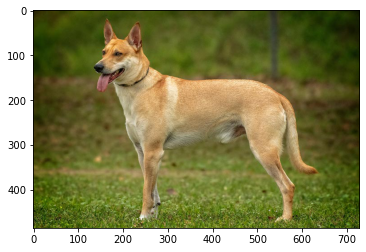

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(imagepath)
plt.imshow(img);